## Q1 error vector 

In [21]:
# error vector 
# from previous part: a= 1, b=-3,c=2
import numpy as np

In [38]:
x = np.array ([-4, 0, 4])
d = np.array ([30, 2, 6])

In [51]:
a = x**2
b = x
c = np.ones_like(x)

In [57]:
A = np.vstack((a, b, c)).T
A

array([[16, -4,  1],
       [ 0,  0,  1],
       [16,  4,  1]])

In [58]:
P = A @ np.linalg.inv (A.T @ A) @ A.T @ d

In [59]:
e = d - P
e

array([0., 0., 0.])

## Q1 Newton's method

In [61]:
from numpy.linalg import solve

# Define the function F corresponding to the system of nonlinear equations
def F(A, B, C):
    return np.array([
        A * (-4 - B) * (-4 - C) - 30,
        A * (0 - B) * (0 - C) - 2,
        A * (4 - B) * (4 - C) - 6
    ])

# Define the Jacobian matrix of the function F
def J(A, B, C):
    return np.array([
        [(-4 - B) * (-4 - C), -A * (-4 - C), -A * (-4 - B)],
        [(0 - B) * (0 - C), -A * (0 - C), -A * (0 - B)],
        [(4 - B) * (4 - C), -A * (4 - C), -A * (4 - B)]
    ])

# Initial iterate
beta = np.array([1, 2, 3])

# Newton's method iteration
for i in range(10):  # Perform 10 iterations
    delta = np.linalg.solve(J(*beta), -F(*beta))
    beta = beta + delta

beta


array([1., 2., 1.])

In [ ]:
# A=0 can't be used as it eliminates the quadratic potential of model 

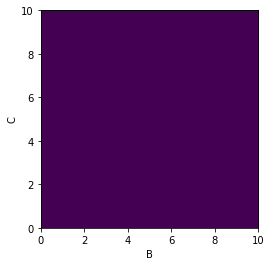

In [64]:
import matplotlib.pyplot as plt
B_range = np.linspace (0, 10, 10)
C_range = np.linspace (0, 10, 10)

convergence = np.zeros((len(B_range), len(C_range))) #1 for covergence, 0 not

def newtons_method (A, B, C, max_iter=50):
    for i in range(max_iter):
        pass
    return False

for i, B in enumerate (B_range):
    for j, C in enumerate (C_range):
        A = 1
        if newtons_method (A, B, C):
            convergence [i,j]=1
            
plt.imshow(convergence, extent= [B_range.min(), B_range.max(), C_range.min(), C_range.max()])
plt.colorbar
plt.xlabel ('B')
plt.ylabel ('C')
plt.show()

## Q2

In [2]:
# The data is a time-series data set for temperature anomoly, 
# downloaded from site: https://ourworldindata.org/grapher/temperature-anomaly
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("temperature-anomaly.csv") 

In [4]:
df = df[['Year','Global average temperature anomaly relative to 1961-1990']]
df

,Year,Global average temperature anomaly relative to 1961-1990
0,1850,-0.417659
1,1851,-0.233350
2,1852,-0.229399
3,1853,-0.270354
4,1854,-0.291630
...,...,...
169,2019,0.891073
170,2020,0.922794
171,2021,0.761856
172,2022,0.801284


In [5]:
year = df[['Year']].values
global_av_temp = df[['Global average temperature anomaly relative to 1961-1990']].values

Text(0, 0.5, 'global average temperature anomaly')

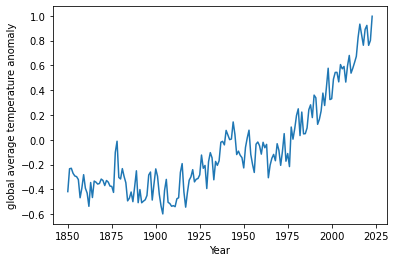

In [6]:
plt.plot(year, global_av_temp)
plt.xlabel ('Year')
plt.ylabel ('global average temperature anomaly')

In [7]:
#1850-2023

time_length = (year.max()-year.min())
bar = (year.max()+year.min())/2

In [90]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 16.4 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
model = LinearRegression()
model.fit(year, global_av_temp)

LinearRegression()

In [10]:
temp_pred = model.predict(year)

In [16]:
print('Coefficients or slope:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients or slope: [[0.00633785]]
Intercept: [-12.34603626]


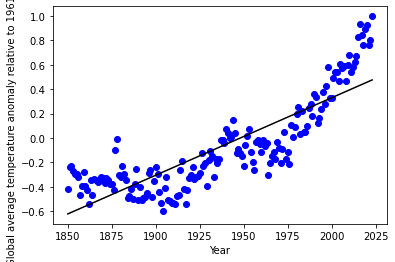

In [15]:
plt.scatter(year, global_av_temp, color = 'blue', label = 'Actual data')
plt.plot(year, temp_pred, color='black', label='Linear fit prediction')
plt.xlabel('Year')
plt.ylabel('Global average temperature anomaly relative to 1961-1990')
plt.show()

In [17]:
diff = global_av_temp - temp_pred
std = np.std (diff)
print('Standard deviation:', std)

Standard deviation: 0.2007690376903123


## Q3